In [3]:
!pip install openpyxl



   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy

In [6]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.5 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.9 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 2.2 MB/s eta 0:00:04
   ----------- ---------------------------- 2.4/8.1 MB 2.5 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.1 MB 2.7 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 3.1 MB/s eta 0:00:02
   ------------------------- -------------- 5.2/8.1 MB 3.4 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------------------------------- ------ 1.8/2.2 MB 9.2 MB/s eta 0:00:01
   ------------------------------

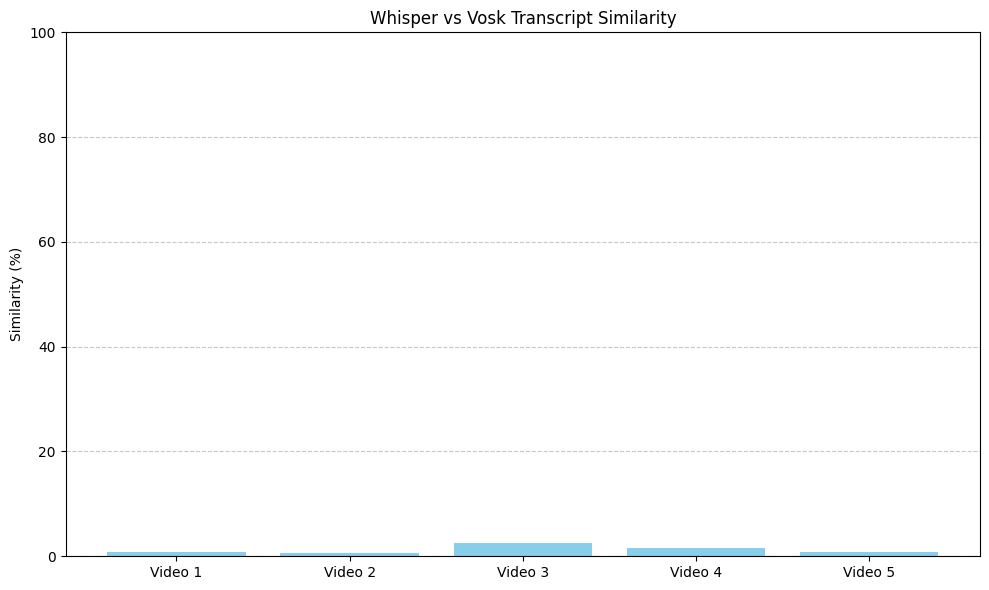

,Video,Whisper Word Count,Vosk Word Count,Similarity (%)
0,Video 1,7988,8987,0.79
1,Video 2,7658,7971,0.63
2,Video 3,10341,10825,2.48
3,Video 4,9199,9447,1.58
4,Video 5,9781,10358,0.83


In [7]:
import pandas as pd
from difflib import SequenceMatcher
import matplotlib.pyplot as plt

# File mapping
file_mapping = [
    {
        "video": "Video 1",
        "whisper": "1739168705-99546210685.mp4_whisper.txt",
        "vosk": "vosk_1739168705-99546210685.txt"
    },
    {
        "video": "Video 2",
        "whisper": "1740031524-96545609525.txt",
        "vosk": "vosk_96545609525.txt"
    },
    {
        "video": "Video 3",
        "whisper": "1740473557-5ea65d4bfbba7875acb26a15.txt",
        "vosk": "vosk_5ea65d4bfbba7875acb26a15.txt"
    },
    {
        "video": "Video 4",
        "whisper": "1740550864-96044236495.txt",
        "vosk": "vosk_96044236495.txt"
    },
    {
        "video": "Video 5",
        "whisper": "transcription.txt",
        "vosk": "vosk_97171473568.txt"
    }
]

# Helper to read files
def read_text(file_path):
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            return f.read().strip()
    except FileNotFoundError:
        return "[File Not Found]"

# Calculate results
results = []
for pair in file_mapping:
    whisper_text = read_text(pair["whisper"])
    vosk_text = read_text(pair["vosk"])
    
    results.append({
        "Video": pair["video"],
        "Whisper Word Count": len(whisper_text.split()),
        "Vosk Word Count": len(vosk_text.split()),
        "Similarity (%)": round(SequenceMatcher(None, whisper_text, vosk_text).ratio() * 100, 2)
    })

df = pd.DataFrame(results)

# Save to Excel
output_path = "whisper_vs_vosk_final.xlsx"
df.to_excel(output_path, index=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(df["Video"], df["Similarity (%)"], color="skyblue")
plt.title("Whisper vs Vosk Transcript Similarity")
plt.ylabel("Similarity (%)")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display DataFrame
df


,Video,Whisper Word Count,Vosk Word Count,Similarity (%),Word Count Difference
0,Video 1,7988,8987,0.79,999
1,Video 2,7658,7971,0.63,313
2,Video 3,10341,10825,2.48,484
3,Video 4,9199,9447,1.58,248
4,Video 5,9781,10358,0.83,577


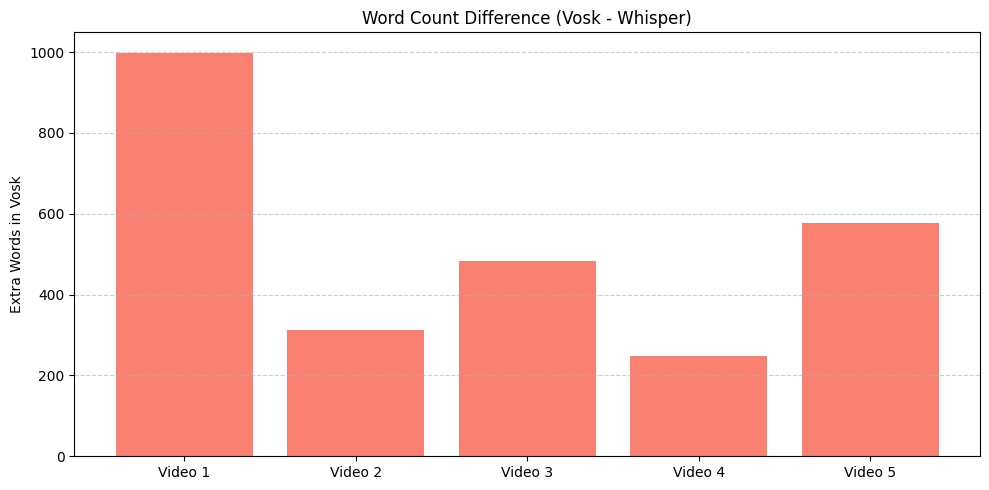

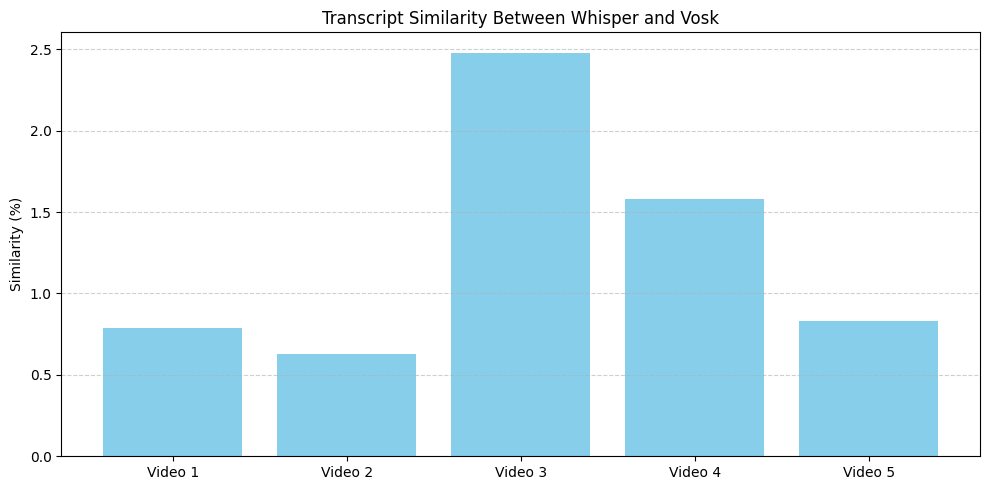

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Your data
data = {
    "Video": ["Video 1", "Video 2", "Video 3", "Video 4", "Video 5"],
    "Whisper Word Count": [7988, 7658, 10341, 9199, 9781],
    "Vosk Word Count": [8987, 7971, 10825, 9447, 10358],
    "Similarity (%)": [0.79, 0.63, 2.48, 1.58, 0.83]
}

# Create DataFrame
df = pd.DataFrame(data)
df["Word Count Difference"] = df["Vosk Word Count"] - df["Whisper Word Count"]

# Display DataFrame
display(df)

# Plot 1: Word Count Difference
plt.figure(figsize=(10, 5))
plt.bar(df["Video"], df["Word Count Difference"], color='salmon')
plt.title("Word Count Difference (Vosk - Whisper)")
plt.ylabel("Extra Words in Vosk")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot 2: Similarity Percentage
plt.figure(figsize=(10, 5))
plt.bar(df["Video"], df["Similarity (%)"], color='skyblue')
plt.title("Transcript Similarity Between Whisper and Vosk")
plt.ylabel("Similarity (%)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
